<h1 align="center">  AIRBNB </b> </h1><br>
![](https://www.insuremyhouse.ie/wp-content/uploads/2019/09/11.png)

# Breakdown of this notebook:
1. **Importing Libraries**
2. **Loading the dataset**
3. **Data Cleaning:** 
 - Deleting redundant columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
4. **Data Visualization:** Using plots to find relations between the features.
    - Get Correlation between different variables
    - Plot all Neighbourhood Group
    - Neighbourhood
    - Room Type
    - Relation between neighbourgroup and Availability of Room
    - Map of Neighbourhood group
    - Map of Neighbourhood
    - Availabity of rooom
5. **Word Cloud**
6. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression


## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
airbnb=pd.read_csv(r'C:\Users\Admin\Desktop\AB_NYC_2019.csv')

#### Print the Shape of the dataset

In [5]:
airbnb.shape

(48895, 16)

#### Print the Datatypes of the dataset

In [6]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Removing the Duplicates if any

In [8]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

#### Check for the null values in each column

In [9]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Drop unnecessary columns

In [10]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### Examining Changes

In [11]:
airbnb.head(5)

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### Rreplace the 'reviews per month' by zero

In [12]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

#### Remove the NaN values from the dataset

In [13]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

### Examine Continous Variables

In [14]:
airbnb.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

### Print all the columns names

In [15]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Get Correlation between different variables

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

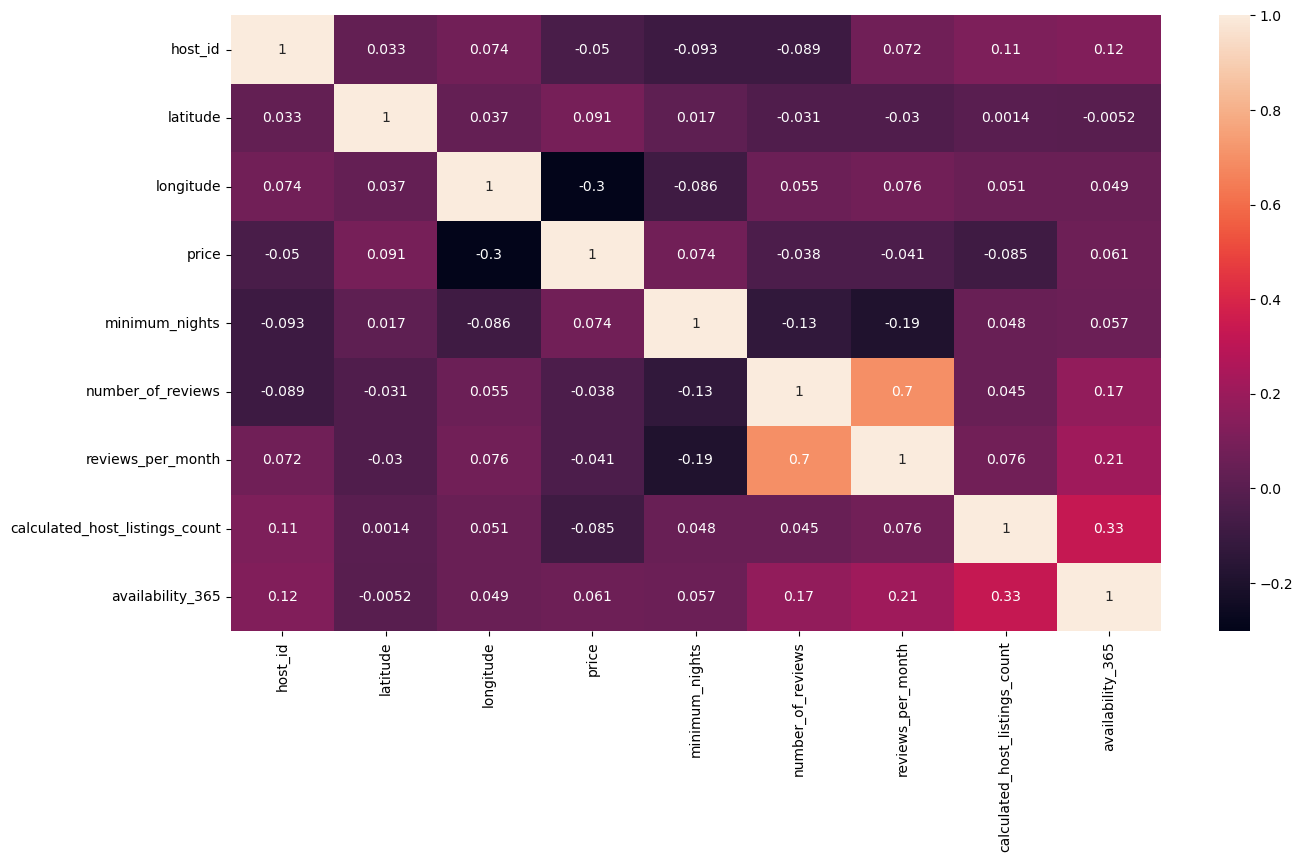

In [16]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [17]:
airbnb.shape

(48895, 12)

In [18]:
airbnb.head(15)

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0      2787            Brooklyn          Kensington  40.64749  -73.97237   
1      2845           Manhattan             Midtown  40.75362  -73.98377   
2      4632           Manhattan              Harlem  40.80902  -73.94190   
3      4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4      7192           Manhattan         East Harlem  40.79851  -73.94399   
5      7322           Manhattan         Murray Hill  40.74767  -73.97500   
6      7356            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7      8967           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8      7490           Manhattan     Upper West Side  40.80178  -73.96723   
9      7549           Manhattan           Chinatown  40.71344  -73.99037   
10     7702           Manhattan     Upper West Side  40.80316  -73.96545   
11     7989           Manhattan      Hell's Kitchen  40.76076  -73.98867   
12     9744            Brooklyn         South Slope  40.66829  -73.98779   
13    11528           Manhattan     Upper West Side  40.79826  -73.96113   
14    11975           Manhattan        West Village  40.73530  -74.00525   

          room_type  price  minimum_nights  number_of_reviews  \
0      Private room    149               1                  9   
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
3   Entire home/apt     89               1                270   
4   Entire home/apt     80              10                  9   
5   Entire home/apt    200               3                 74   
6      Private room     60              45                 49   
7      Private room     79               2                430   
8      Private room     79               2                118   
9   Entire home/apt    150               1                160   
10  Entire home/apt    135               5                 53   
11     Private room     85               2                188   
12     Private room     89               4                167   
13     Private room     85               2                113   
14  Entire home/apt    120              90                 27   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                0.00                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
5                0.59                               1               129  
6                0.40                               1                 0  
7                3.47                               1               220  
8                0.99                               1                 0  
9                1.33                               4               188  
10               0.43                               1                 6  
11               1.50                               1                39  
12               1.34                               3               314  
13               0.91                               1               333  
14               0.22                               1                 0

## Data Visualization

In [19]:
import seaborn as sns

In [20]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

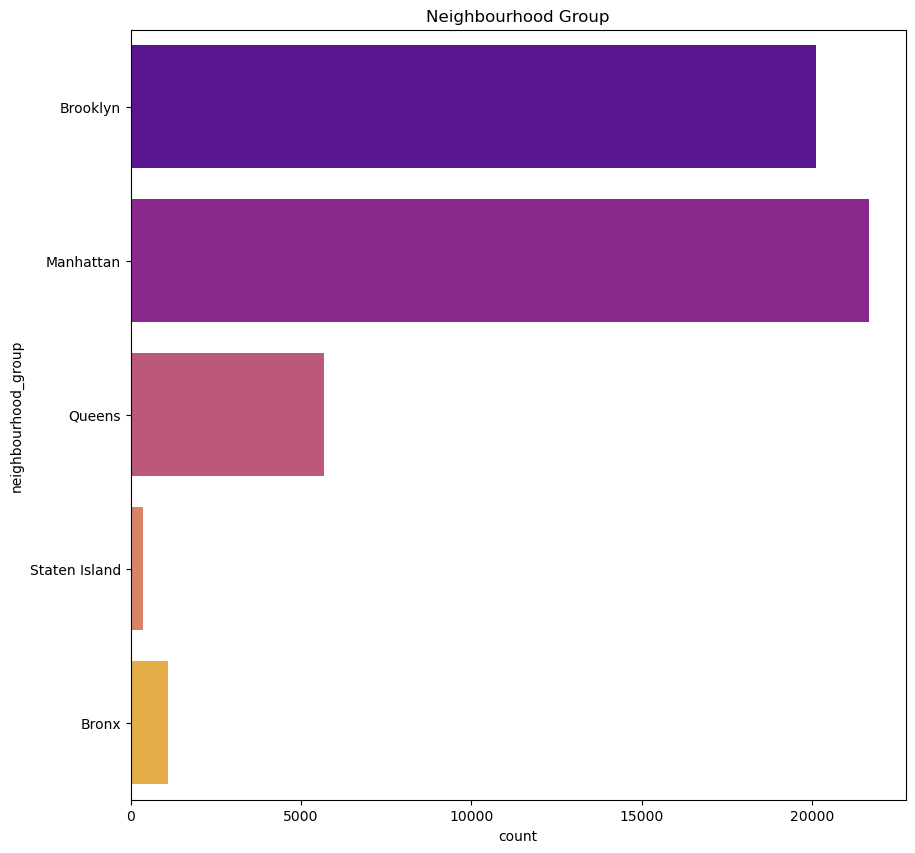

In [21]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

### Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

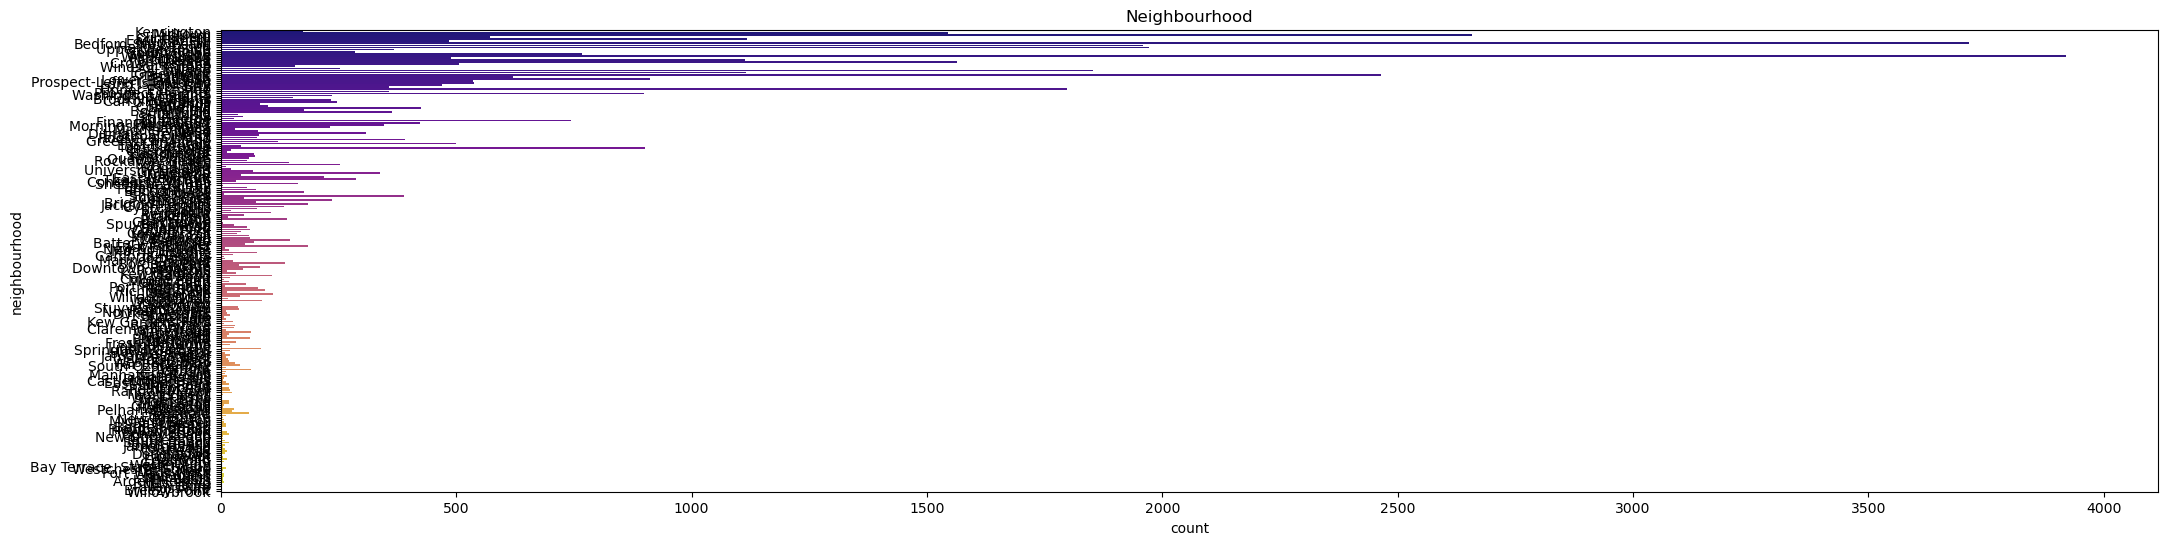

In [22]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

### Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

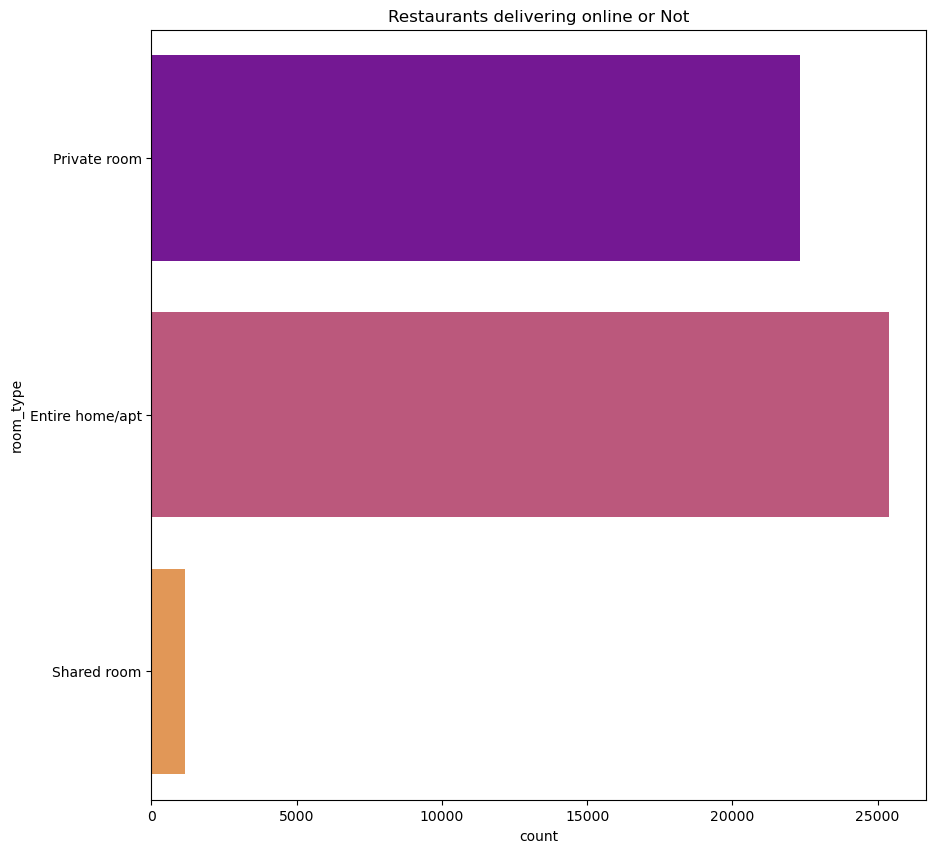

In [23]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

### Relation between neighbourgroup and Availability of Room

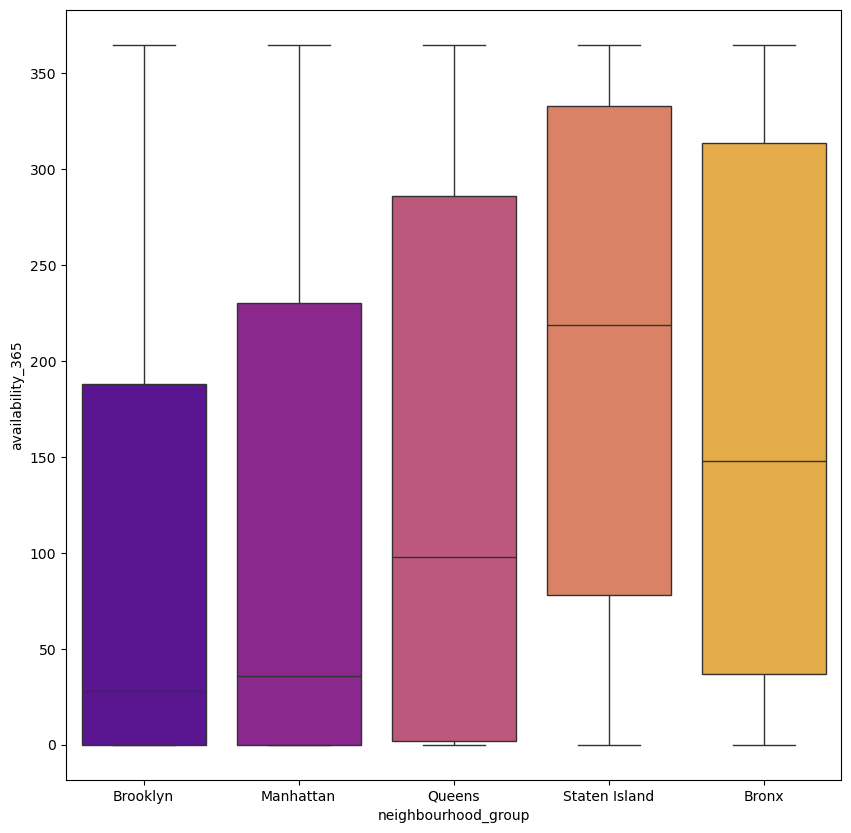

In [24]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

## Map of Neighbourhood group

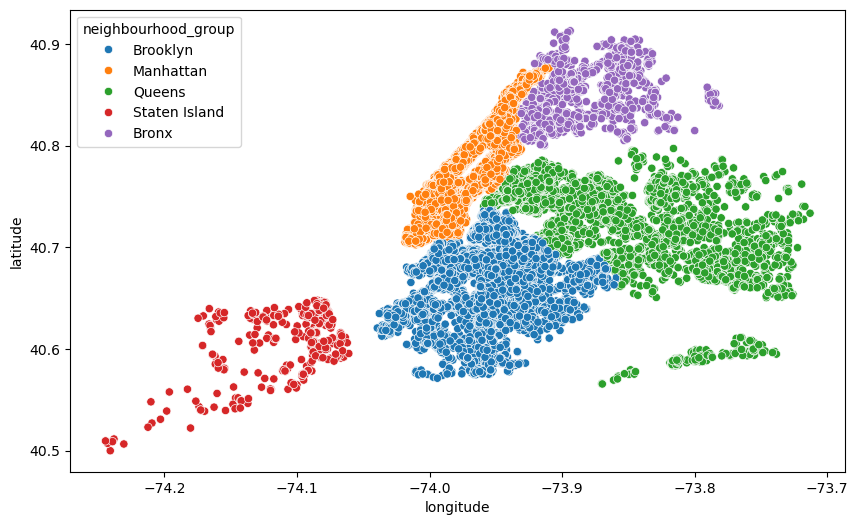

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'airbnb' is your pandas DataFrame and it has 'longitude', 'latitude', and 'neighbourhood_group' columns.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=airbnb)
plt.show()  # This is generally preferred to display the plot, especially outside of Jupyter notebooks or interactive environments.


## Map of Neighbourhood

plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood)
plt.ioff()

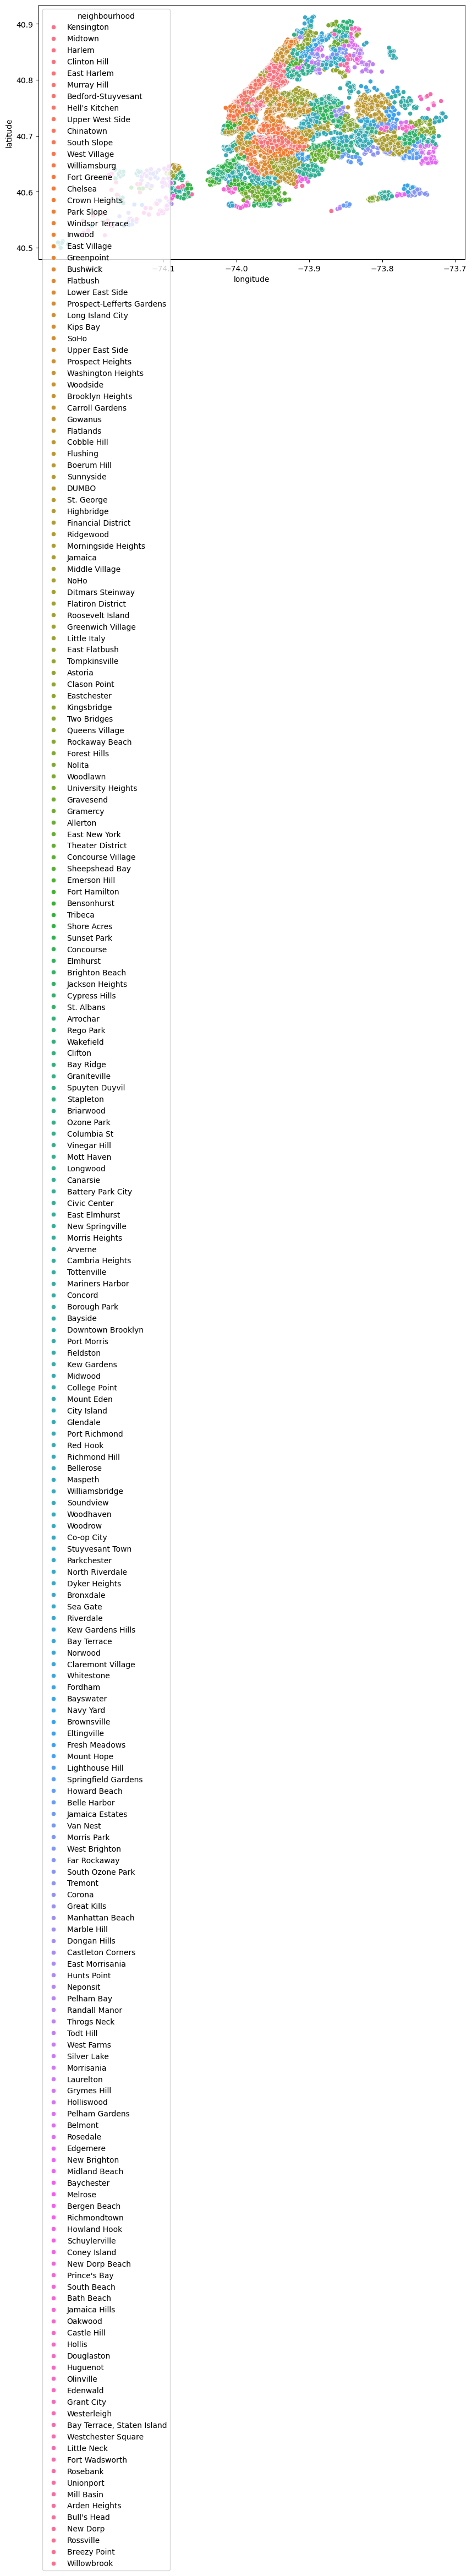

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# I'm assuming 'airbnb' is your DataFrame, and it contains 'longitude', 'latitude', and 'neighbourhood' columns.
plt.figure(figsize=(10, 6))
# Correct the call to sns.scatterplot by specifying arguments as keywords:
sns.scatterplot(x=airbnb['longitude'], y=airbnb['latitude'], hue=airbnb['neighbourhood'])
plt.show()  # It's better to use plt.show() to explicitly display the plot.


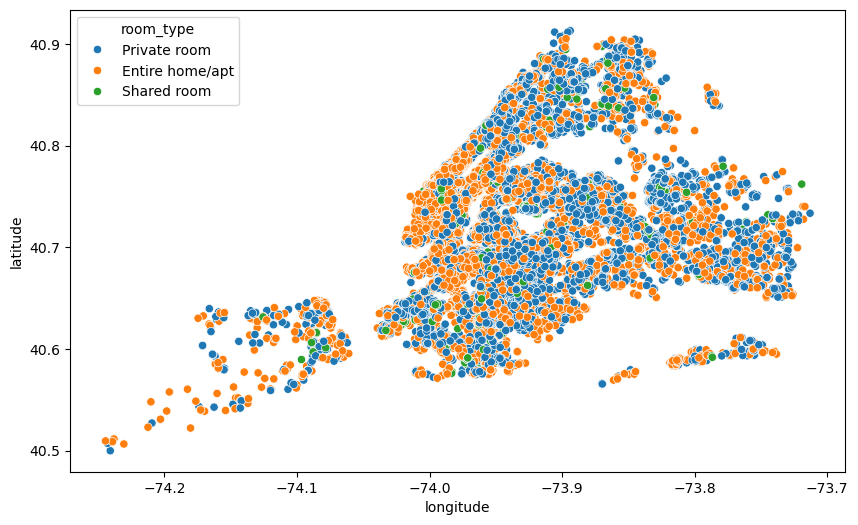

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=airbnb)
plt.ioff()


## Availability of Room

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data=airbnb)
plt.ioff()


## WordCloud

In [39]:


from wordcloud import WordCloud

<Figure size 1000x600 with 0 Axes>

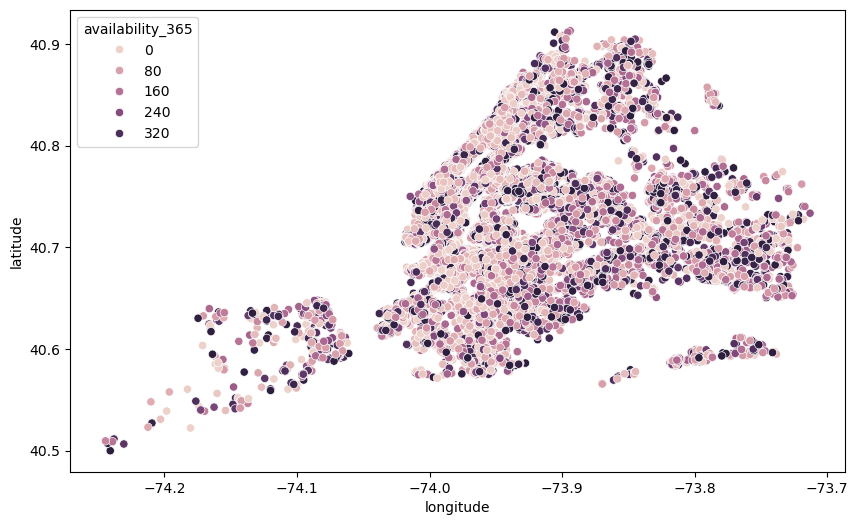

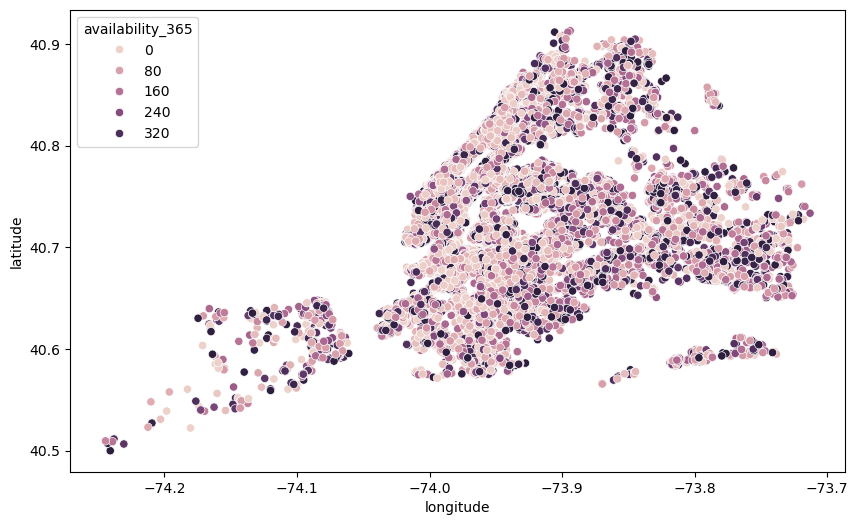

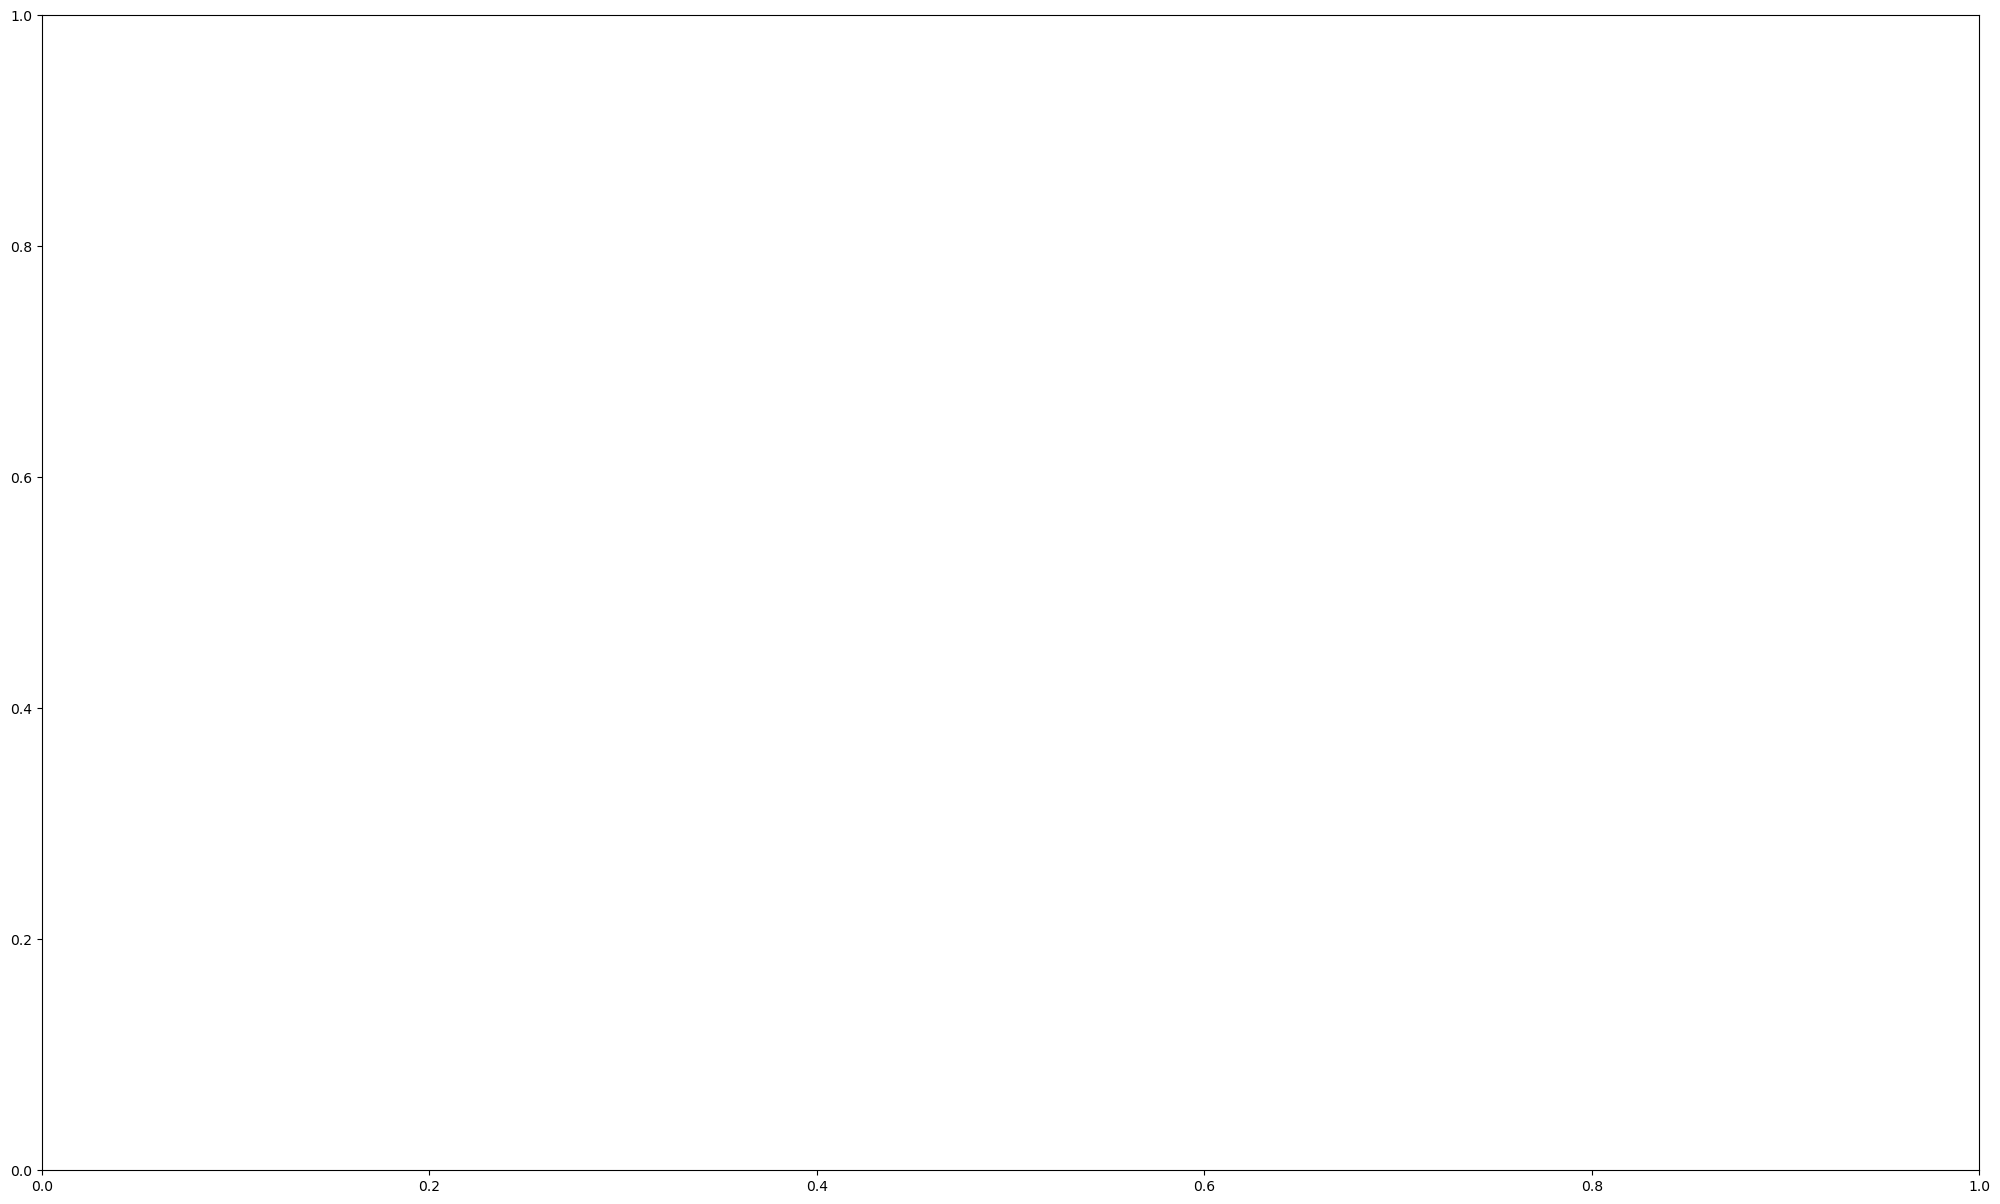

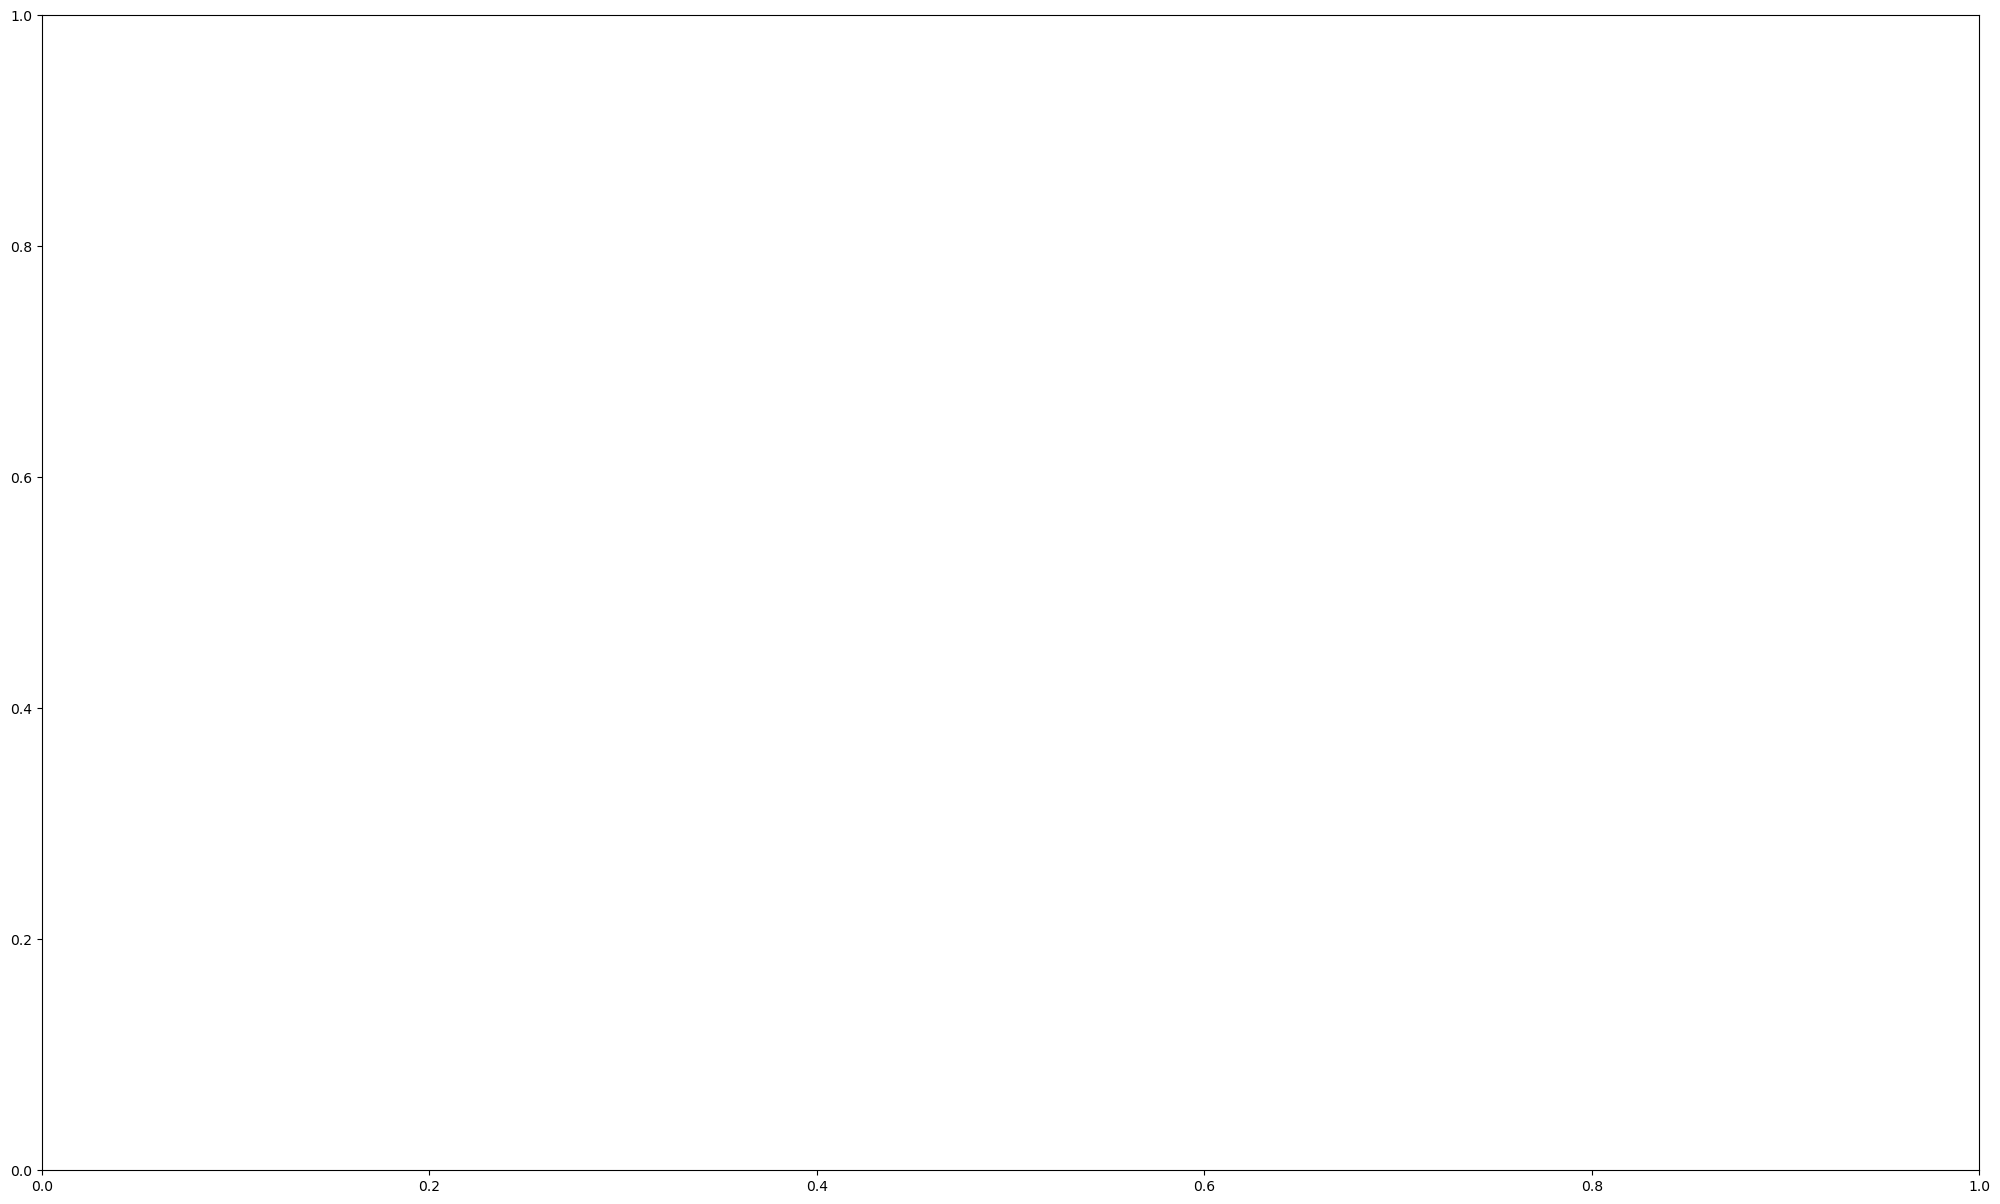

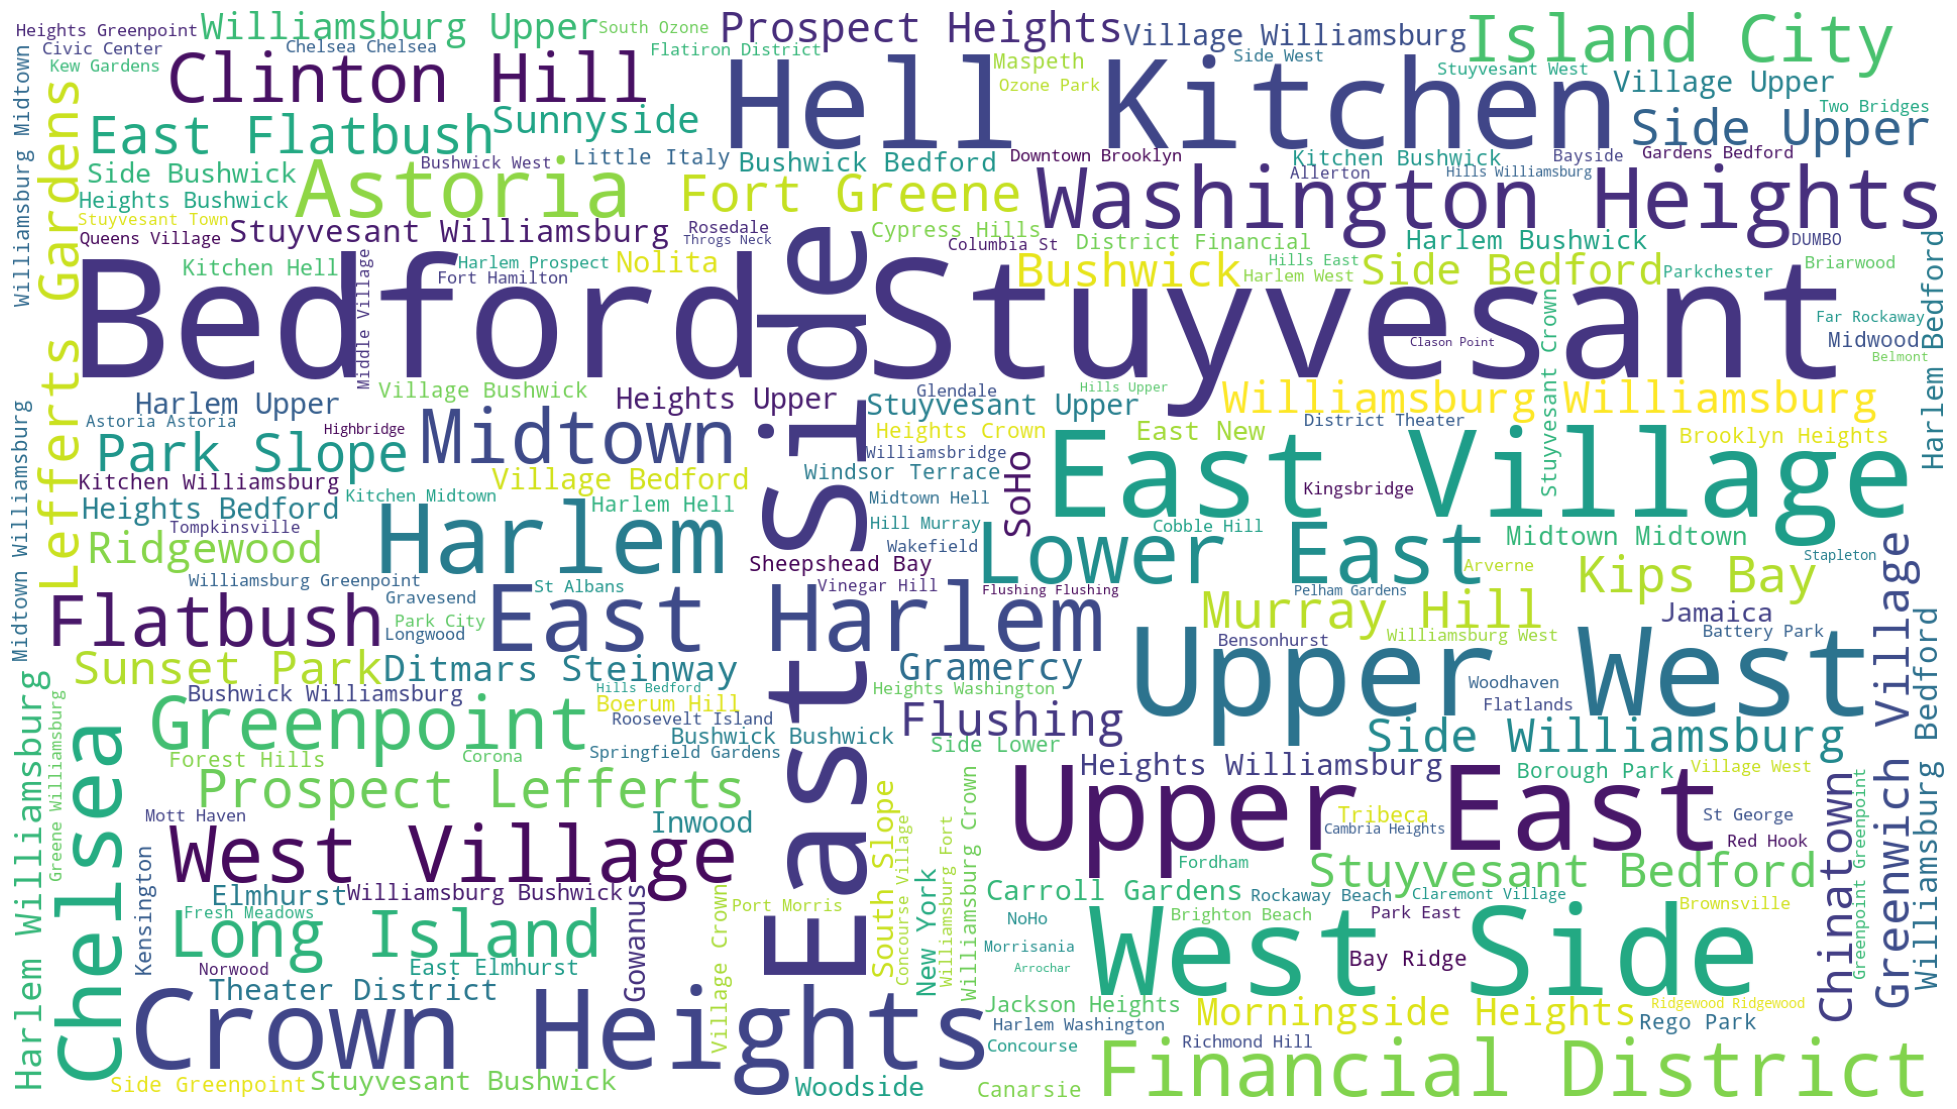

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Your existing code for setting up the figure size
plt.subplots(figsize=(25,15))

# Now this part will work, because WordCloud has been imported
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(airbnb.neighbourhood))  # Assuming airbnb.neighbourhood is a Series of neighbourhood names

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()


## Regression Analysis

### Drop Columns

In [42]:
import pandas as pd

# Replace 'path_to_airbnb_csv' with the actual path to your CSV file
airbnb = pd.read_csv(r'C:\Users\Admin\Desktop\AB_NYC_2019.csv')

# Now you can safely drop the columns
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

# Examine the changes
print(airbnb.head(5))


     id                                              name    host_name  \
0  2539                Clean & quiet apt home by the park         John   
1  2595                             Skylit Midtown Castle     Jennifer   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3  3831                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4  5022  Entire Apt: Spacious Studio/Loft by central park        Laura   

  neighbourhood_group        room_type  price  minimum_nights last_review  \
0            Brooklyn     Private room    149               1  2018-10-19   
1           Manhattan  Entire home/apt    225               1  2019-05-21   
2           Manhattan     Private room    150               3         NaN   
3            Brooklyn  Entire home/apt     89               1  2019-07-05   
4           Manhattan  Entire home/apt     80              10  2018-11-19   

   calculated_host_listings_count  availability_365  
0                               6     

In [43]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [44]:
airbnb_en.head(15)

id                                              name    host_name  \
0   2539                Clean & quiet apt home by the park         John   
1   2595                             Skylit Midtown Castle     Jennifer   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !    Elisabeth   
3   3831                   Cozy Entire Floor of Brownstone  LisaRoxanne   
4   5022  Entire Apt: Spacious Studio/Loft by central park        Laura   
5   5099         Large Cozy 1 BR Apartment In Midtown East        Chris   
6   5121                                   BlissArtsSpace!        Garon   
7   5178                  Large Furnished Room Near B'way      Shunichi   
8   5203                Cozy Clean Guest Room - Family Apt    MaryEllen   
9   5238                Cute & Cozy Lower East Side 1 bdrm          Ben   
10  5295                  Beautiful 1br on Upper West Side         Lena   
11  5441                   Central Manhattan/near Broadway         Kate   
12  5803    Lovely Room 1, Garden, Best Area, Legal rental       Laurie   
13  6021  Wonderful Guest Bedroom in Manhattan for SINGLES      Claudio   
14  6090                     West Village Nest - Superhost        Alina   

    neighbourhood_group  room_type  price  minimum_nights last_review  \
0                     0          0    149               1  2018-10-19   
1                     1          1    225               1  2019-05-21   
2                     1          0    150               3         NaN   
3                     0          1     89               1  2019-07-05   
4                     1          1     80              10  2018-11-19   
5                     1          1    200               3  2019-06-22   
6                     0          0     60              45  2017-10-05   
7                     1          0     79               2  2019-06-24   
8                     1          0     79               2  2017-07-21   
9                     1          1    150               1  2019-06-09   
10                    1          1    135               5  2019-06-22   
11                    1          0     85               2  2019-06-23   
12                    0          0     89               4  2019-06-24   
13                    1          0     85               2  2019-07-05   
14                    1          1    120              90  2018-10-31   

    calculated_host_listings_count  availability_365  
0                                6               365  
1                                2               355  
2                                1               365  
3                                1               194  
4                                1                 0  
5                                1               129  
6                                1                 0  
7                                1               220  
8                                1                 0  
9                                4               188  
10                               1                 6  
11                               1                39  
12                               3               314  
13                               1               333  
14                               1                 0

In [46]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [52]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [53]:
x_train.shape

(44005, 5)

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r'C:\Users\Admin\Desktop\AB_NYC_2019.csv')

# Assuming 'price' is your target variable
X = data.drop(['price'], axis=1)
y = data['price']

# Keep only numeric columns for simplicity (adjust as needed for your analysis)
X = X.select_dtypes(include=[np.number])

# Handling missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Prepare and fit the Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Making predictions
y_pred = reg.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2}')


R^2 score: 0.03819302371390465


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer

# Assuming 'data' is your DataFrame loaded from 'AB_NYC_2019.csv'
# Ensure 'price' is your target variable and it's excluded from 'X'
y = data['price']
X = data.drop(['price'], axis=1)

# Exclude non-numeric columns for simplicity; in practice, consider encoding them
X_numeric = X.select_dtypes(include=[np.number])

# Handling missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_numeric)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.1, random_state=105)

# Initialize the Decision Tree Regressor
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)

# Fit the model on the training data
DTree.fit(X_train, y_train)

# Make predictions on the test set
y_predict = DTree.predict(X_test)

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_predict)
print(f'R^2 score: {r2}')


R^2 score: 0.08289865395830243


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
data = pd.read_csv(r'C:\Users\Admin\Desktop\AB_NYC_2019.csv')

# Define your target variable and features
y = data['price']  # The target variable is 'price'
X = data.drop(['price'], axis=1)  # Dropping 'price' from the features

# Update these lists with the actual names of your categorical and numeric columns
categorical_features = ['neighbourhood_group', 'room_type']  # Example categorical features in the Airbnb dataset
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# Define transformations for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(min_samples_leaf=.0001))
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=105)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_predict = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_predict)
print(f'R^2 score: {r2}')


R^2 score: 0.015608168721792048


## For further updates of this Kernel check into this GitHub Link: https://github.com/chiragsamal/airbnb

#### Refernces
 - https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
 - https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
 - https://www.kaggle.com/geowiz34/maps-of-nyc-airbnbs-with-python

>  # <font color='orange'> Please UPVOTE if you found these helpful :) </font>